In [1]:
# Early depression detection - data analysis

In [2]:
import pandas as pd 

In [3]:
positive_data_train = pd.read_csv("positive_examples_train.csv")
negative_data_train = pd.read_csv("negative_examples_train.csv")
positive_data = pd.read_csv("positive_examples.csv") 
negative_data = pd.read_csv("negative_examples.csv")

positive_data['depressed'] = 1
negative_data['depressed'] = 0

In [4]:
positive_data

,id,title,date,text,depressed
0,test_subject1345,NaN,2015-05-20 05:12:23,So many unwanted Smith fadeaways.,1
1,test_subject1345,Mid-Range Jumpers,2015-05-20 04:56:18,"Hey guys, Celtics fan here pulling hard for th...",1
2,test_subject1345,NaN,2015-05-01 05:51:20,Well he got 2 tonight so maybe he'll be able t...,1
3,test_subject1345,NaN,2015-04-30 13:49:51,I mean he'll get pinch hits and an occasional ...,1
4,test_subject1345,NaN,2015-04-30 05:47:34,Yeah you're probably right. Oh well.,1
...,...,...,...,...,...
18724,test_subject9942,NaN,2015-02-09 13:36:09,"it is compelling, because suicide is a popular...",1
18725,test_subject9942,NaN,2015-02-09 13:31:32,"you say you were raised Christian, you need to...",1
18726,test_subject9942,NaN,2015-02-09 13:26:23,I honestly couldn't think of title and I just ...,1
18727,test_subject9942,NaN,2015-02-09 13:20:55,not referring to those genres\n\nI mean what I...,1


In [5]:
pos_unique = positive_data_train['id'].drop_duplicates()
n_pos = len(pos_unique)
n_pos

83

In [6]:
neg_unique = negative_data_train['id'].drop_duplicates()
n_neg = len(neg_unique)
n_neg

403

In [7]:
# The overall error would be the
# mean of the p ERDE values.

In [8]:
# ERDE function
def evaluation_metric(y_pred,y_true):
    error = 0
    cfp, cfn, ctp, ctn = (n_pos)/(n_pos+n_neg),1, 1, 0
    for i in range(len(y_pred)):
        if y_pred[i]==1 and 0==y_true[i]:
            error+= cfp
        elif y_pred[i]==1 and 1==y_true[i]:
            error+= method(i)
        elif y_pred[i]==0 and 0==y_true[i]:
            continue
        elif y_pred[i]==0 and 1==y_true[i]:
            error+= cfn
        
def method(i):
    pass


In [9]:
#preparing data

In [100]:
import re
#cleaning unimportant stuff like links, etc..
positive_data_train['text'] = positive_data_train['text'].astype("str").map(str.strip)
positive_data_train['text'] = positive_data_train['text'].apply(lambda x: re.sub('  ', ' ', x.lower()))
positive_data_train['text'] = positive_data_train['text'].apply(lambda x: re.sub(r'http\S+', '', x)) 
positive_data_train['text'] = positive_data_train['text'].apply(lambda x: re.sub(r"www\S+", "", x)) 
positive_data_train['text'] = positive_data_train['text'].apply(lambda x: re.sub(r"@\S+", "", x)) 

negative_data_train['text'] = negative_data_train['text'].astype("str").map(str.strip)
negative_data_train['text'] = negative_data_train['text'].apply(lambda x: re.sub('  ', ' ', x.lower()))
negative_data_train['text'] = negative_data_train['text'].apply(lambda x: re.sub(r'http\S+', '', x)) 
negative_data_train['text'] = negative_data_train['text'].apply(lambda x: re.sub(r"www\S+", "", x)) 
negative_data_train['text'] = negative_data_train['text'].apply(lambda x: re.sub(r"@\S+", "", x))

#concating test data
data_test = pd.concat([positive_data,negative_data])
data_test['text'] = data_test['text'].astype("str").map(str.strip)
data_test['text'] = data_test['text'].apply(lambda x: re.sub('  ', ' ', x.lower()))
data_test['text'] = data_test['text'].apply(lambda x: re.sub(r'http\S+', '', x)) 
data_test['text'] = data_test['text'].apply(lambda x: re.sub(r"www\S+", "", x)) 
data_test['text'] = data_test['text'].apply(lambda x: re.sub(r"@\S+", "", x))




In [101]:
#lematizing
from nltk.stem import WordNetLemmatizer
positive_data_train['text_lem'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', '', line)) for line in lists.split()]).strip() for lists in positive_data_train['text']]
negative_data_train['text_lem'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', '', line)) for line in lists.split()]).strip() for lists in negative_data_train['text']] 
data_test['text_lem'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', '', line)) for line in lists.split()]).strip() for lists in data_test['text']] 

In [102]:
#concat data 
positive_data_train['depressed'] = 1
negative_data_train['depressed'] = 0
data_train = pd.concat([positive_data_train,negative_data_train])
data_train

C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,date,depressed,id,sent,text,text_lem,title
0,2015-07-01 19:07:30,1,train_subject1095,0.0000,i believe we get it next week.,i believe we get it next week,NaN
1,2015-06-30 21:10:58,1,train_subject1095,0.9260,**dark horse**\n\n* neverboy #5\n\n**dc comics...,dark horse neverboy dc comic batman beyond ...,NaN
2,2015-06-30 07:53:29,1,train_subject1095,0.0000,i have actually never seen batman: year 100 me...,i have actually never seen batman year mentio...,NaN
3,2015-06-28 12:52:03,1,train_subject1095,0.0000,when is year 2 due?,when is year due,NaN
4,2015-06-27 22:45:27,1,train_subject1095,0.3612,i didn't know i wanted zack morris as green la...,i didnt know i wanted zack morris a green lant...,NaN
...,...,...,...,...,...,...,...
264167,2014-04-22 17:49:27,0,train_subject9974,NaN,what's your favorite vehicle of any kind from ...,whats your favorite vehicle of any kind from s...,Favorite SciFi ride?
264168,2014-04-22 17:35:18,0,train_subject9974,NaN,"back in the day, kane could barely speak. he w...",back in the day kane could barely speak he wa ...,Why did Kane go from demon spawn to corporate ...
264169,2014-04-20 15:21:57,0,train_subject9974,NaN,"in honor of easter, what's your favorite easte...",in honor of easter whats your favorite easter ...,Favorite comic book easter egg?
264170,2014-04-19 17:40:11,0,train_subject9974,NaN,"i've never really read many dark horse titles,...",ive never really read many dark horse title an...,Recommended Dark Horse reading?


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [104]:
vectorizer = TfidfVectorizer(max_df=0.3, max_features=100, min_df=10, stop_words='english',ngram_range=(2,3), use_idf=True)
X = vectorizer.fit_transform(positive_data_train['text'])


In [105]:
print (X.toarray())
print (vectorizer.get_feature_names())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['10 minutes', '20 minutes', '30 minutes', 'best friend', 'big deal', 'couple years', 'depression anxiety', 'didn know', 'didn think', 'didn want', 'doesn make', 'doesn mean', 'doesn want', 'doesn work', 'don believe', 'don care', 'don feel', 'don know', 'don like', 'don mind', 'don need', 'don really', 'don remember', 'don think', 'don understand', 'don want', 'don worry', 'feel bad', 'feel better', 'feel free', 'feel like', 'feel way', 'feels like', 'felt like', 'good luck', 'good thing', 'hard time', 'hey guys', 'high school', 'just don', 'just feel', 'just got', 'just like', 'just need', 'just started', 'just want', 'just wanted', 'know just', 'know people', 'let know', 'like don', 'like just', 'like people', 'like said', 'little bit', 'll just', 'll try', 'long term', 'long time', 'look like', 'looks like', 'lot people', 'lot t

In [106]:
#extracting most important features from each model
def show_most_informative_features(vect, clf, n=20):
    feature_names = vect.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        


In [107]:
data_train_grouped = data_train.groupby(['id'], as_index=False).agg(lambda x: x.tolist())
data_train_grouped['text_lem'] = [' '.join(lists).strip()  for lists in data_train_grouped['text']] 
data_test_grouped = data_test.groupby(['id'], as_index=False).agg(lambda x: x.tolist())
data_test_grouped['text_lem'] = [' '.join(lists).strip() for lists in data_test_grouped['text']] 


In [108]:
data_train_grouped.loc[data_train_grouped.depressed.str[0]==1,'depressed']='1'
data_train_grouped.loc[data_train_grouped.depressed.str[0]==0,'depressed']='0'

In [109]:
data_test_grouped.loc[data_test_grouped.depressed.str[0]==1,'depressed']='1'
data_test_grouped.loc[data_test_grouped.depressed.str[0]==0,'depressed']='0'

In [110]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# nltk.download('vader_lexicon')
# Sentiment score to be added to each post
sid = SentimentIntensityAnalyzer()

data_train['sentiment_compound_polarity']=data_train.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
data_train['sentiment_neutral']=data_train.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
data_train['sentiment_negative']=data_train.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
data_train['sentiment_pos']=data_train.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
data_train['sentiment_type']=''

data_train.loc[data_train.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
data_train.loc[data_train.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
data_train.loc[data_train.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

In [116]:
data_train[(data_train.sentiment_type=='POSITIVE') & (data_train.depressed==0)]

,date,depressed,id,sent,text,text_lem,title,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
29,2015-07-16 23:08:35,0,train_subject1015,NaN,this is reassuring thank you.,this is reassuring thank you,NaN,0.6369,0.366,0.000,0.634,POSITIVE
246,2015-06-03 10:49:26,0,train_subject1015,NaN,an excellent point! i wonder how people found ...,an excellent point i wonder how people found t...,NaN,0.5719,0.709,0.000,0.291,POSITIVE
247,2015-06-03 10:23:55,0,train_subject1015,NaN,thanks! a follow up then. does the child's lun...,thanks a follow up then doe the child lung not...,NaN,0.2023,0.762,0.100,0.138,POSITIVE
504,2015-04-02 15:18:25,0,train_subject1015,NaN,just finished watching and i can't but help fe...,just finished watching and i cant but help fee...,ELI5: What language are the cops speaking in T...,0.5593,0.611,0.158,0.231,POSITIVE
572,2015-03-23 15:35:23,0,train_subject1015,NaN,that explains it. although kelloggs are now gi...,that explains it although kellogg are now givi...,NaN,0.3400,0.906,0.000,0.094,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
264166,2014-04-22 19:28:06,0,train_subject9974,NaN,"i know it's a huge selection, but fantasy is c...",i know it a huge selection but fantasy is choc...,What's your favorite weapon in all of fantasy?,0.6187,0.897,0.000,0.103,POSITIVE
264167,2014-04-22 17:49:27,0,train_subject9974,NaN,what's your favorite vehicle of any kind from ...,whats your favorite vehicle of any kind from s...,Favorite SciFi ride?,0.9186,0.735,0.000,0.265,POSITIVE
264168,2014-04-22 17:35:18,0,train_subject9974,NaN,"back in the day, kane could barely speak. he w...",back in the day kane could barely speak he wa ...,Why did Kane go from demon spawn to corporate ...,0.6597,0.714,0.064,0.221,POSITIVE
264169,2014-04-20 15:21:57,0,train_subject9974,NaN,"in honor of easter, what's your favorite easte...",in honor of easter whats your favorite easter ...,Favorite comic book easter egg?,0.9231,0.662,0.000,0.338,POSITIVE


Text(0.5, 1.0, 'Sentiment of Tweets by Depressed People')

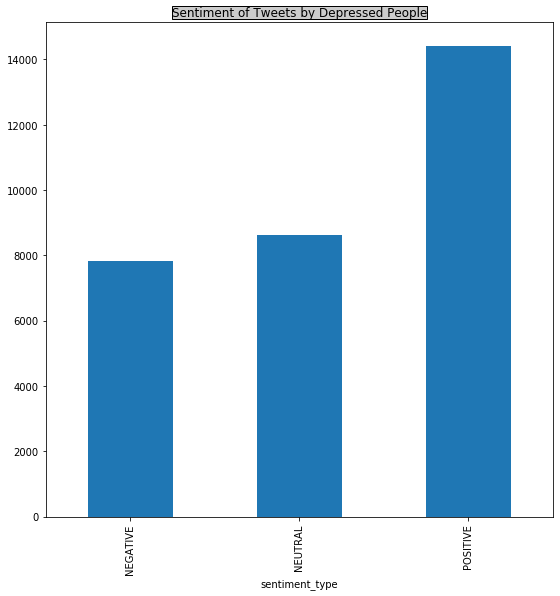

In [117]:
data_train_sentiment_depressed = data_train.loc[:,['depressed','sentiment_neutral', 'sentiment_type', 'text', 'text_lem']]
data_train_sentiment_depressed = data_train_sentiment_depressed[data_train_sentiment_depressed.depressed == 1]

# Plotting 
import matplotlib.pyplot as plt 

data_train_sentiment_depressed = data_train_sentiment_depressed.groupby(['sentiment_type'])['sentiment_neutral'].count()
data_train_sentiment_depressed.rename("",inplace=True)
plt.subplot(221)
data_train_sentiment_depressed.transpose().plot(kind='bar',figsize=(20, 20))
plt.title('Sentiment of Tweets by Depressed People', bbox={'facecolor':'0.8', 'pad':0})


Text(0.5, 1.0, 'Sentiment of Tweets by Not Depressed People')

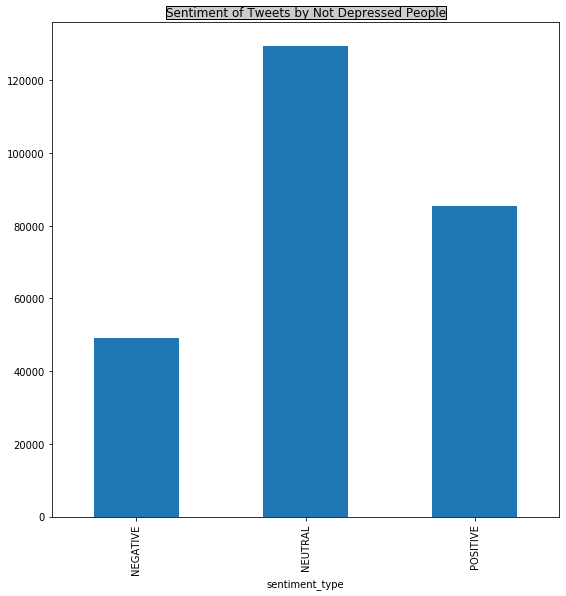

In [135]:
data_train_sentiment_not_depressed = data_train.loc[:,['depressed','sentiment_neutral', 'sentiment_type', 'text', 'text_lem']]
data_train_sentiment_not_depressed = data_train_sentiment_not_depressed[data_train_sentiment_not_depressed.depressed == 0]

data_train_sentiment_not_depressed[data_train_sentiment_not_depressed.sentiment_type=='NEUTRAL']
data_train_sentiment_not_depressed = data_train_sentiment_not_depressed.groupby(['sentiment_type'])['sentiment_neutral'].count()
data_train_sentiment_not_depressed.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
data_train_sentiment_not_depressed.transpose().plot(kind='bar',figsize=(20, 20))
plt.title('Sentiment of Tweets by Not Depressed People', bbox={'facecolor':'0.8', 'pad':0})

0.03614457831325301
0.007444168734491315


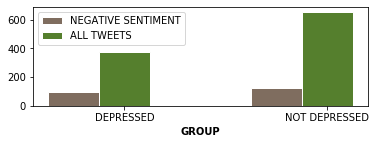

In [137]:
# plotting % of negative tweets 
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
 
# set height of bar
print (len(data_train_sentiment_depressed)/n_pos)
print (len(data_train_sentiment_not_depressed)/n_neg)
bars1 = [data_train_sentiment_depressed['NEGATIVE']/n_pos,data_train_sentiment_not_depressed["NEGATIVE"]/n_neg]
bars2 = [data_train_sentiment_depressed.sum()/n_pos,data_train_sentiment_not_depressed.sum()/n_neg]
 
plt.subplot(2,1,1)

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='NEGATIVE SENTIMENT')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='ALL TWEETS')
 
# Add xticks on the middle of the group bars
plt.xlabel('GROUP', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['DEPRESSED', 'NOT DEPRESSED'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

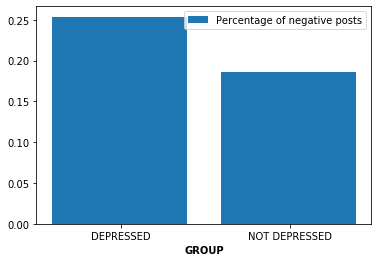

In [140]:
#CALC % of negative tweets
x = np.arange(2)

data = [data_train_sentiment_depressed["NEGATIVE"]/data_train_sentiment_depressed.sum(),
        data_train_sentiment_not_depressed["NEGATIVE"]/data_train_sentiment_not_depressed.sum()]

# Make the plot
plt.bar(x, data,label='Percentage of negative posts')
barWidth = 0.01
# Add xticks on the middle of the group bars
plt.xlabel('GROUP', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(data))], ['DEPRESSED', 'NOT DEPRESSED'])
 
# Create legend & Show graphic
plt.legend()

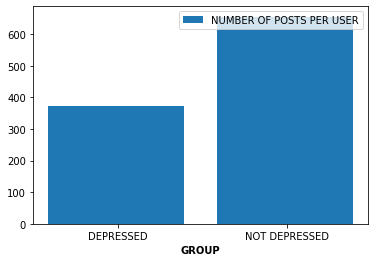

In [141]:
x = np.arange(2)
data = [data_train_sentiment_depressed.sum()/n_pos,data_train_sentiment_not_depressed.sum()/n_neg]

# Make the plot
plt.bar(x, data, label='NUMBER OF POSTS PER USER')
barWidth = 0.01
# Add xticks on the middle of the group bars
plt.xlabel('GROUP', fontweight='bold')
plt.xticks([r+barWidth for r in range(len(data))], ['DEPRESSED', 'NOT DEPRESSED'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [142]:
# Finding I's in text
data_train['text_len_word'] = data_train['text_lem'].apply(lambda x: re.findall(r'(\S+)', x))
data_train['text_len_word'] = data_train['text_len_word'].apply(len)
data_train['text_i'] = data_train['text_lem'].apply(lambda x: re.findall(r'(?:\s|^)i(?=\s|$)', x))
data_train['text_i'] = data_train['text_i'].apply(len)
# Finding what percentage of "i" is of all posts words
data_train['text_i_percent'] = (data_train['text_i']/data_train['text_len_word'])*100


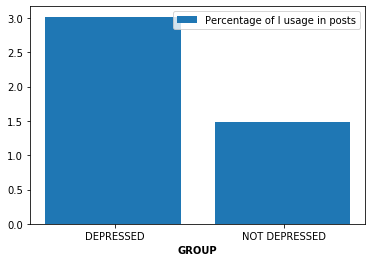

In [143]:
#Examining the difference between depressed and non-depressed "i" usage:
per_of_i = data_train.groupby(['depressed'])['text_i_percent'].mean()
per_of_i
#Graphing it:
x = np.arange(2)

data = [per_of_i[1], per_of_i[0]]

# Make the plot
plt.bar(x, data,label='Percentage of I usage in posts')
barWidth = 0.01
# Add xticks on the middle of the group bars
plt.xlabel('GROUP', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(data))], ['DEPRESSED', 'NOT DEPRESSED'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [144]:
abs_words = ["absolutely","all","always","complete","completely","constant","constantly","definitely","entire","ever","every","everyone","everything",
             "full","must","never","nothing","totally","whole"]

def count_absolutist(x):
    sum = 0
    for word in abs_words:
        sum+=x.count(word)
    
    return sum

data_train_grouped['abs'] = data_train_grouped['text_lem'].apply(lambda x: count_absolutist(x))


In [145]:
data_train_grouped['n_words'] = data_train_grouped['text_lem'].apply(lambda x: len(re.findall(r'\w+', x)))

In [146]:
#Calculating percentage of absolutist words
data_train_grouped['abs_p'] = (data_train_grouped['abs']/data_train_grouped['n_words'])*100

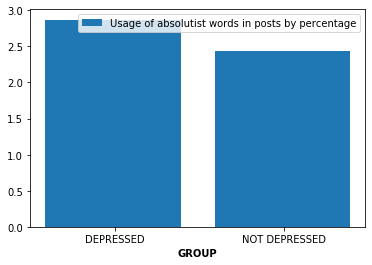

In [147]:
# Graphing it
per_of_abs = data_train_grouped.groupby(['depressed'])['abs_p'].mean()
per_of_abs
x = np.arange(2)

data = [per_of_abs[1], per_of_abs[0]]

# Make the plot
plt.bar(x, data,label='Usage of absolutist words in posts by percentage')
barWidth = 0.01
# Add xticks on the middle of the group bars
plt.xlabel('GROUP', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(data))], ['DEPRESSED', 'NOT DEPRESSED'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

This is the end of our **Exploatoary Data Analysis**. We have found few interesting insights through our data from which we can work on and try to implement them as features which could end up improving our **final model**. If you are interested to see how this features performed on predicting depression and were they of any help, please look up second part of this project.